## Introducción

#### Importamos las librerías necesarias

In [1]:
import pandas as pd
import time
import networkx as nx

In [2]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

#### Importamos los dataframes creados con los datos descargados y el grafo

In [3]:
# Creamos el grafo
#g=nx.Graph()

g = nx.read_gpickle('graphSimple2.gpickle')
#g = nx.read_gpickle('FraudAnalysisGraph.gpickle')

In [4]:
#dfrelacionesCargos = pd.DataFrame()
#dfrelacionesParticipadas= pd.DataFrame()
#dfempresas= pd.DataFrame()
dfrelacionesParticipadas= pd.read_pickle('./Alberto.data/RelacionesEmpresasParticipadas')
dfrelacionesCargos = pd.read_pickle('./Alberto.data/RelacionesCargos')
dfrelacionesAccionistas = pd.read_pickle('./Alberto.data/RelacionesAccionistas')
dfrelacionesPuestos = pd.read_pickle('./Alberto.data/RelacionesPuestos')
dfwork = pd.read_pickle('dfwork3')
dfaudit = pd.read_pickle('dfaudit3')
dfbanks = pd.read_pickle('dfbanks3')
dfeventosborme= pd.read_csv('BORMEEvents.csv')

#### Detalle de los dataframes

In [5]:
g.node['ESA48280192']

{'cifraNegocio': 54757.401289999994,
 'class': 'PJ_gbi0',
 'gbi_h0': 0,
 'grupo': u'ESA48280192',
 'name': 'Betsaide, Sociedad Anonima Laboral',
 'num_accExt': 8,
 'num_parExt': 0,
 'rating': 6.9328006115300003,
 'scoreGraph': 1.0777139999999998,
 'type': 'Persona juridica'}

In [6]:
g.edges(['Ana Belen Escobar Herradon'])

[('Ana Belen Escobar Herradon', 'ESB86419496')]

In [7]:
g['Ana Belen Escobar Herradon']['ESB86419496']

{'type': 4, 'type_neo': 'DIRECTOR'}

In [8]:
dfeventosborme.head(2)

,Unnamed: 0,rowID,razon,evento,subevento,codevento,actor,fecha_publicacion,cif,nombre
0,0,6826517,SL,Nombramientos.,vicepresidente,44014,PENA RUSHTON JUAN ANTONIO,11/02/2010,B15371222,CENTRAL ELECTRODOMESTICOS NOROESTE
1,1,6826518,SL,Nombramientos.,secretario,4409,BABIO LOPEZ JESUS,11/02/2010,B15371222,CENTRAL ELECTRODOMESTICOS NOROESTE


In [9]:
dfeventosborme.evento.unique()

array(['Nombramientos.', 'Reelecciones.', 'Ceses/Dimisiones.',
       'Situaci\xc3\xb3n concursal.', 'Disoluci\xc3\xb3n.',
       'Modificaciones estatutarias.',
       'Declaraci\xc3\xb3n de unipersonalidad.', 'Revocaciones.',
       'Sociedad unipersonal.', 'Fusi\xc3\xb3n por absorci\xc3\xb3n.',
       'Declaraci\xc3\xb3n  de unipersonalidad.',
       'Articulo 378.5 del Reglamento del Registro Mercantil.',
       'Escisi\xc3\xb3n parcial.', 'Escisi\xc3\xb3n total.',
       'Otros conceptos', 'Transformaci\xc3\xb3n de sociedad.',
       'P\xc3\xa1gina web de la sociedad.'], dtype=object)

In [6]:
dfeventosborme.subevento.unique()

array(['vicepresidente', 'secretario', 'consejero', 'presidente',
       'num0concurso', 'auditor', 'apoderado0solid', 'liquidador',
       'admin0unico', 'voluntaria', 'admin0solid', 'cambio0organo0admin',
       'apoderado', 'apoderado0mancom', 'consejero0delegado',
       'admin0mancom', 'socio0unico', 'consejero0delegado0mancom',
       'representan', 'socio', 'apoderado0solid0mancom',
       'secretario0noconsej', 'vicesecretario0noconsej',
       'consejero0delegado0solid', 'vicesecretario', 'benef0absorcion',
       'no0aprobac0cuentas', 'escindidas', 'gerente', 'entidad0gestora',
       'admin0conc', 'insolvencia', 'cambio0socio0unico', 'crea0web',
       'miem0cons0rector'], dtype=object)

In [9]:
dfwork.head(2)

,Nombre,Código NIF,Fecha constitución,Estado,Código primario CNAE 2009,Incidencias Judiciales,Reclamaciones administrativas,Coordenada - X,Coordenada - Y
1,ESPACIO ELECTRICO SL,B84860568,2006-09-25 00:00:00,Activa,4321,NaN,NaN,-3.67824,40.350476
9,SEÑALIZACION DE PROCESOS Y RIESGOS SL,B62813092,2002-02-25 00:00:00,Activa,4619,NaN,NaN,0,0


In [11]:
dfrelacionesParticipadas.head(2)

,nombre,CIF,tipoRelacion,nombre,participadaId,participadaCodPais,porcentajeDirecto,porcentajeTotal
0,NOVASERRA SA,A28940542,participada,NAVAL 77 SA,ESA84203181,ES,"49,75",n.d.
1,NOVASERRA SA,A28940542,participada,GEURCO SA,ESA28832335,ES,"46,82",n.d.


In [11]:
dfrelacionesCargos.head(2)

,nombre,CIF,tipoRelacion,nombre,fechaNombramiento,actual
0,NOVATECH CONSULTING ESTRATEGIA Y TECNOLOGIAS D...,B84000678,Administrador Único,Don Jose Vicente Escanciano Herranz,2006-07-25 00:00:00,Current
1,NOVES DIMENSIONS INTEGRALS SL,B62034103,Administrador Único;Administrador único,Don Jordi Abellan Mercade,2006-08-01 00:00:00,Current


In [13]:
dfrelacionesAccionistas.head(2)

,nombreEmpresa,CIF,nombreAccionista,idAccionista,isoPaisAccionista,%directo,%total
0,PLATA HUELMO SL,B01032341,MR JOSE IGNACIO PLATA ORTE,ES*339817771,ES,"33,33",n.d.
1,PLATA HUELMO SL,B01032341,MR VICTOR HUELMO CALDERON,ES*339817770,ES,"33,33",n.d.


In [14]:
dfrelacionesPuestos.head(2)

,nombreEmpresa,CIF,fechaUltimaDocRecibida,numEmpresasTieneFuncion,nombreCargo,cargo,fechaCita,actual,numAccionistas,file
0,PLASTICS DEL TERRI SL,B17368259,None,None,"Directors / managers / contacts are available,...",None,None,None,0.0,../../data/datasets/SABI/lista2/39 Lista2 Empr...
1,PLASTIHORMA SL,B03061223,None,None,"Directors / managers / contacts are available,...",None,None,None,1.0,../../data/datasets/SABI/lista2/39 Lista2 Empr...


In [5]:
dfaudit.head(2)

,Nombre,Código NIF,Número BvD,Nombre auditor,Salvedades
4426,ALVAREZ FRA SA,A28995231,ESA28995231,MGR DE AUDITORIA Y CONSULTORIA S.L.,Aprobado
4427,ALVAREZ FRA SA,A28995231,ESA28995231,PINTOS COSTA EMILIO,Aprobado


## Transformación de datos

#### Eliminamos del grafo aquellos nodos que son bancos (CNAE 641)

In [10]:
g.remove_nodes_from(set(dfbanks[u'Número BvD'].str.encode('utf-8')))

#### Eliminación de nulos y codificación de campos

In [11]:
# DataFrame de empresas
dfwork[u'Fecha constitución'] = dfwork[u'Fecha constitución'].str.encode('utf-8')
dfwork.Nombre = dfwork.Nombre.str.encode('utf-8')
dfwork.Estado = dfwork.Estado.str.encode('utf-8')
dfwork.Estado = dfwork.Estado.fillna('Desconocido')
dfwork[u'Incidencias Judiciales'] = dfwork[u'Incidencias Judiciales'].str.encode('utf-8')
dfwork[u'Incidencias Judiciales'] = dfwork[u'Incidencias Judiciales'].fillna('0')
dfwork[u'Reclamaciones administrativas'] = dfwork[u'Reclamaciones administrativas'].str.encode('utf-8')
dfwork[u'Reclamaciones administrativas'] = dfwork[u'Reclamaciones administrativas'].fillna('0')
dfwork[u'Código primario CNAE 2009'] = dfwork[u'Código primario CNAE 2009'].str.encode('utf-8')
dfwork[u'Fecha constitución'] = dfwork[u'Fecha constitución'].fillna('0')
#dfwork.forma=dfwork.forma.str.encode('utf-8')
#dfwork.CIF=dfwork.CIF.str.encode('utf-8')


In [12]:
# DataFrame de auditores
dfaudit = dfaudit.dropna(subset=[u'Nombre auditor',u'Salvedades'], how='any')

#dfaudit[u'Nombre auditor'].fillna('Desconocido')

Añadimos el campo 'Número BvD'

In [13]:
# Cambiamos el nombre de la columna CIF
dfaudit.columns = [u'Nombre', 'CIF', u'Número BvD', u'Nombre auditor', u'Salvedades']
dfwork.columns = [u'Nombre', 'CIF', u'Número BvD', u'Fecha constitución', 
          u'Estado', u'Código primario CNAE 2009', u'Incidencias Judiciales',
          u'Reclamaciones administrativas', u'Coordenada - X', u'Coordenada - Y']

In [14]:
# Ponemos la columna CIF como índice
#dfaudit2 = dfaudit.set_index('CIF')
dfwork2 = dfwork.set_index('CIF')

In [15]:
# Mapeamos el df por la columna CIF del dfwork
dfrelacionesAccionistas['NBvD']=dfrelacionesAccionistas.CIF.map(dfwork2[u'Número BvD'])
dfrelacionesCargos['NBvD']=dfrelacionesCargos.CIF.map(dfwork2[u'Número BvD'])
dfrelacionesPuestos['NBvD']=dfrelacionesPuestos.CIF.map(dfwork2[u'Número BvD'])
dfeventosborme['NBvD']=dfeventosborme.cif.map(dfwork2[u'Número BvD'])

#### Creamos los nodos y relaciones

In [16]:
#def crear_nodo_empresa_x(empresa,g):
#    try:
#         g.add_node(enc(empresa.CIF), nodetype='empresa', nombre=enc(empresa.nombre),
#                    fconst=enc(empresa.fconst), estado=enc(empresa.estado), CNAE=enc(empresa.CNAE),
#                    incidenciasJudiciales=enc(empresa.incidenciasJudiciales), 
#                    reclamacionesAdministrativas=enc(empresa.reclamacionesAdministrativas),
#                    longitud=enc(empresa.longitud), lat=enc(empresa.lat))
#    except Exception as e:
#        print 'ERROR:',e.args,':','create_node_empresa_x:en la creacion del nodo EMPRESA:',empresa.CIF
#        
#    return empresa

def crear_nodo_accionista_x(dfrelacionesAccionistas,g):
    try:
         g.add_node(dfrelacionesAccionistas['NBvD'], nodetype='accionista', 
                    nombreEmpresa=dfrelacionesAccionistas['nombreEmpresa'],
                    nombreAccionista=dfrelacionesAccionistas['nombreAccionista'],
                    id=dfrelacionesAccionistas['idAccionista'],
                   porcDirecto=dfrelacionesAccionistas['%directo'],
                   porcTotal=dfrelacionesAccionistas['%total'])
    except Exception as e:
        print 'ERROR:',e.args,':','crear_nodo_accionista_x:en la creacion del nodo ACCIONISTA:',dfrelacionesAccionistas.nombre

#def crear_nodo_participada_x(participada,g):
#    try:
#         g.add_node(enc(participada.nombre), nodetype='participada', 
#                    nombre=enc(participada.nombre), id=enc(participada.participadaId))
#    except Exception as e:
#        print 'ERROR:',e.args,':','crear_nodo_participada_x:en la creacion del nodo PARTICIPADA:',participada.nombre
        
#    return empresa

def crear_nodo_actor_x(dfeventosborme,g):
    try:
        g.add_node(dfeventosborme['actor'], nodetype='actor')         
    except Exception as e:
        print 'ERROR:',e.args,':','create_node_actor_x:en la creacion de nodo ACTOR:',dfeventosborme.actor

def crear_nodo_auditor_x(dfaudit,g):
    try:
        g.add_node(dfaudit[u'Nombre auditor'], nodetype='auditor')
    except Exception as e:
        print 'ERROR:',e.args,':','create_node_auditor_x:en la creacion de nodo AUDITOR:',dfaudit[u'Nombre auditor']

def crear_relacion_auditor_x(dfaudit,g):
    try:
        g.add_edge(#dfaudit['CIF'], 
                   dfaudit[u'Número BvD'], dfaudit[u'Nombre auditor'], edgetype='AUDITOR', salvedades=dfaudit.Salvedades)
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_auditor_x:en la creacion de la relacion',auditor[u'Nombre auditor']

def crear_relacion_evento_x(dfeventosborme,g):
    try:   
         g.add_edge(dfeventosborme['NBvD'],dfeventosborme['actor'], edgetype=dfeventosborme['evento'], 
                    fecha=dfeventosborme['fecha_publicacion'], sub=dfeventosborme['subevento'])
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_evento_x:en la creacion de la relacion'

#def crear_relacion_participada_x(participada,g):
#    try:   
#         g.add_edge(participada.cifpadre,participada.nombre, edgetype='PARTICIPADA', 
#                    porcentajeDirecto=participada.porcentajeDirecto, porcentajeTotal=participada.porcentajeTotal)
#    except Exception as e:
#        print 'ERROR:',e.args,':','crear_relacion_participada_x:en la creacion de la relacion',participada.nombre
        
def crear_relacion_accionista_x(dfrelacionesAccionistas,g):
    try:   
         g.add_edge(dfrelacionesAccionistas['NBvD'],
                    dfrelacionesAccionistas['nombreAccionista'], 
                    edgetype='ACCIONISTA',
                    idAccionista=dfrelacionesAccionistas['idAccionista'],
                   porcDirecto=dfrelacionesAccionistas['%directo'],
                   porcTotal=dfrelacionesAccionistas['%total'])
    except Exception as e:
        print 'ERROR:',e.args,':','crear_relacion_accionista_x:en la creacion de la relacion',dfrelacionesAccionistas.nombre
    
#def crear_relacion_auditor_x(auditor,g):

In [17]:
def add_empresa_attributes(dfwork,g):
    if dfwork[u'Número BvD'] in g.nodes():
        g.node[dfwork[u'Número BvD']]['cif'] = dfwork[u'CIF']
        g.node[dfwork[u'Número BvD']]['fecha_const'] = dfwork[u'Fecha constitución']
        g.node[dfwork[u'Número BvD']]['estado'] = dfwork['Estado']
        g.node[dfwork[u'Número BvD']]['cnae'] = dfwork[u'Código primario CNAE 2009']
        g.node[dfwork[u'Número BvD']]['inc_judic'] = dfwork[u'Incidencias Judiciales']
        g.node[dfwork[u'Número BvD']]['recl_admin'] = dfwork[u'Reclamaciones administrativas']
        g.node[dfwork[u'Número BvD']]['lat_x'] = dfwork[u'Coordenada - X']
        g.node[dfwork[u'Número BvD']]['long_y'] = dfwork[u'Coordenada - Y']

## Creación del grafo para Análisis de fraude

#### Creamos el grafo

Añadimos los nodos y relaciones de auditoría

In [18]:
#try:
dfaudit.apply(crear_nodo_auditor_x, axis=1, args=(g,))
dfaudit.apply(crear_relacion_auditor_x, axis=1, args=(g,))
#except Exception as a:
#    print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y nodos auditor'  

4426     None
4427     None
4428     None
9222     None
9223     None
9224     None
9227     None
9231     None
9232     None
9233     None
11553    None
11555    None
11556    None
12368    None
12370    None
12372    None
13117    None
13118    None
13119    None
14330    None
14332    None
14335    None
14336    None
15415    None
15416    None
15417    None
15489    None
16119    None
16120    None
16121    None
         ... 
32677    None
32678    None
32679    None
32836    None
33948    None
35286    None
35287    None
35294    None
35295    None
35297    None
35298    None
35300    None
35306    None
35310    None
37585    None
38366    None
41383    None
41384    None
41385    None
41386    None
41894    None
41895    None
41896    None
41897    None
41898    None
42710    None
42712    None
43071    None
43072    None
43124    None
dtype: object

Añadimos los atributos que nos faltan

In [19]:
dfwork.apply(add_empresa_attributes, axis=1, args=(g,))

KeyboardInterrupt: 

Probamos que existen los nuevos nodos

In [21]:
g.node['ESA28995231']

{'nodetype': 'auditor'}

#### Guardamos el grafo

In [ ]:
nx.write_gpickle(g, 'GraphEmpresasAuditores.gpickle')

## Creación del grafo para API

Partimos del grafo de fraude

In [20]:
h = nx.read_gpickle('FraudAnalysisGraph.gpickle')

EOFError: 

Añadimos los accionistas

In [13]:
#try:
dfrelacionesAccionistas.apply(crear_nodo_accionista_x, axis=1, args=(g,))
dfrelacionesAccionistas.apply(crear_relacion_accionista_x, axis=1, args=(g,))
#except Exception as a:
#    print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y las relaciones de empresas participadas' 

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
189207    None
189208    None
189209    None
189210    None
189211    None
189212    None
189213    None
189214    None
189215    None
189216    None
189217    None
189218    None
189219    None
189220    None
189221    None
189222    None
189223    None
189224    None
189225    None
189226    None
189227    None
189228    None
189229    None
189230    None
189231    None
189232    None
189233    None
189234    None
189235    None
189236    None
dtype: object

Guardamos el grafo

In [ ]:
nx.write_gpickle(g, 'GraphEmpresasAccionistas.gpickle')

Añadimos los eventos

In [12]:
#try:
dfeventosborme.apply(crear_nodo_actor_x, axis=1, args=(g,))
dfeventosborme.apply(crear_relacion_evento_x, axis=1, args=(g,))
#except Exception as a:
#    print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y las relaciones de empresas participadas' 

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
951360    None
951361    None
951362    None
951363    None
951364    None
951365    None
951366    None
951367    None
951368    None
951369    None
951370    None
951371    None
951372    None
951373    None
951374    None
951375    None
951376    None
951377    None
951378    None
951379    None
951380    None
951381    None
951382    None
951383    None
951384    None
951385    None
951386    None
951387    None
951388    None
951389    None
dtype: object

In [ ]:
#try:
dfeventosborme.apply(crear_relacion_evento_x, axis=1, args=(g,))
#except Exception as a:
#    print 'ERROR:',a.args,':','procesando dataFrame para la creacion del grafo y las relaciones de empresas participadas' 

Guardamos el grafo

In [ ]:
nx.write_gpickle(g, 'GraphEmpresasEventos.gpickle')

## Algoritmos aplicados

#### Descripción del grafo

In [21]:
g.number_of_nodes()

2905246

In [22]:
g.number_of_edges()

1843316

In [11]:
# Creo que este algoritmo no es necesario
atributos = nx.get_node_attributes(g, 'type')

In [13]:
list(set(atributos.values()))

['Persona fisica', 'Persona juridica']

In [13]:
sum( x == 'Persona fisica' for x in atributos.values() )

1383551

In [7]:
nx.degree(g)

{'WW*361110850': 1,
 'ESB92074863': 0,
 'ESB43648955': 0,
 'ESB70335781': 1,
 'Fer Do Aceiton Sorrentini': 1,
 'WW*337064749': 1,
 'ESB10440881': 1,
 'ESB26511147': 1,
 'Ana Belen Escobar Herradon': 1,
 'Laura Mesa Gomez': 1,
 'WW*337064740': 1,
 'WW*337064742': 1,
 'WW*337064743': 1,
 'WW*337064744': 1,
 'ESB38721320': 0,
 'ESB03896800': 0,
 'ESB31908981': 2,
 'ESB36313245': 0,
 'ESB20970562': 0,
 'ESB91072140': 1,
 'ESB25549833': 1,
 'ESB14615520': 1,
 'ESA35708791': 0,
 'ESB13353263': 1,
 'Michael Taylor Paul': 1,
 'Jose Luis Martinez De Urbina Abrisqueta': 1,
 'Jose Dominguez Gonzalez': 2,
 'ESB43830686': 1,
 'PT507472241': 2,
 'ESB86049772': 2,
 'Rosario Marin Miguel': 1,
 'WW*360839341': 1,
 'ESB85019040': 0,
 'WW*335452749': 1,
 'ES*340809267': 1,
 'ESB61138772': 3,
 'ESU14896427': 2,
 'ESA83484261': 1,
 'Sergio Vicenzo Laudati Tringali': 1,
 'ESB52014230': 2,
 'WW*340712561': 1,
 'WW*360983195': 1,
 'Miguel Ortega Polo': 1,
 'Maria Pilar Faro Iglesias': 1,
 'PT*343293318': 1,
 

In [8]:
nx.degree_histogram(g)

[553690,
 1741300,
 356623,
 126213,
 51196,
 26829,
 13682,
 7744,
 4629,
 3022,
 2029,
 1423,
 1001,
 789,
 663,
 488,
 412,
 358,
 268,
 238,
 219,
 164,
 152,
 131,
 106,
 96,
 79,
 96,
 67,
 71,
 65,
 53,
 47,
 40,
 40,
 47,
 46,
 32,
 28,
 29,
 21,
 32,
 25,
 17,
 15,
 11,
 15,
 10,
 13,
 13,
 20,
 19,
 8,
 8,
 8,
 12,
 8,
 13,
 9,
 9,
 10,
 6,
 7,
 4,
 6,
 8,
 5,
 8,
 4,
 9,
 2,
 2,
 3,
 3,
 0,
 5,
 0,
 4,
 2,
 1,
 6,
 2,
 5,
 4,
 0,
 2,
 3,
 3,
 3,
 5,
 6,
 2,
 3,
 7,
 0,
 3,
 3,
 2,
 3,
 2,
 1,
 5,
 2,
 2,
 2,
 4,
 8,
 5,
 0,
 0,
 1,
 3,
 3,
 0,
 0,
 0,
 2,
 3,
 3,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 4,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

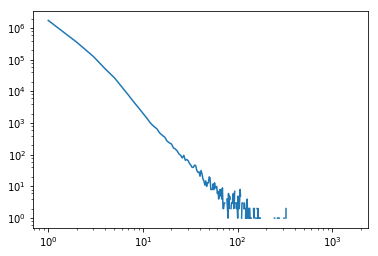

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(nx.degree_histogram(g))

In [17]:
nx.density(g)

2.0446977816422875e-07

In [13]:
nx.eccentricity(g)

NetworkXError: Graph not connected: infinite path length

In [12]:
nx.diameter(g)

NetworkXError: Graph not connected: infinite path length

In [28]:
nx.average_shortest_path_length(g)

NetworkXError: Graph is not connected.

In [23]:
nx.isolates(g)

['ESB92074863',
 'ESB43648955',
 'ESB38721320',
 'ESB03896800',
 'ESB36313245',
 'ESB20970562',
 'ESA35708791',
 'ESB85019040',
 'ESA33924465',
 'ESB99163727',
 'ESB03919313',
 'ESB12613964',
 'ESB96608120',
 'ESB04477063',
 'ESB18668608',
 'ESB57436107',
 'ESB20598306',
 'ESB26217828',
 'ESB41830340',
 'ESB54031513',
 'ESB61770475',
 'ESB96743547',
 'ESB64411200',
 'ESB62849955',
 'ESB33956954',
 'ESB09400094',
 'ESB91653097',
 'ESB64035553',
 'ESB13454640',
 'ESA01004266',
 'ESB22150858',
 'ESB80434608',
 'ESB11813995',
 'ESB25407958',
 'ESB04366159',
 'ESA58438177',
 'ESB82859653',
 'ESB64417413',
 'ESB62600515',
 'ESB65490351',
 'ESB96703186',
 'ESB36425791',
 'ESB11518636',
 'ESB95220943',
 'ESB26291153',
 'ESB07311905',
 'ESB53751285',
 'ESB26367367',
 'ESB84213495',
 'ESB54112990',
 'ESB57186975',
 'ESB35972306',
 'ESB39535042',
 'ESB49217532',
 'ESB43072081',
 'ESB64059983',
 'ESB45583325',
 'ESB23468192',
 'ESB73063562',
 'ESB39687967',
 'ESB18699397',
 'ESB58418260',
 'ESB192

In [24]:
len(nx.isolates(g))

546430

#### Medidas de centralidad

In [49]:
indegree = g.in_degree()

In [18]:
import operator
indegree = g.in_degree()
sorted_x = sorted(indegree.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('Cambio del Organo de Administraci\xc3\xb3n:', 7066),
 ('Voluntaria.', 2970),
 ('DELOITTE SL', 713),
 ('PRICEWATERHOUSECOOPERSAUDITORES SL', 473),
 ('ERNST & YOUNG SL', 386),
 ('insolvencia', 376),
 ('KPMG AUDITORES SL', 349),
 ('ESB81745754', 301),
 ('ESV20066411', 287),
 ('ESA08001851', 250),
 ('ESA47412333', 229),
 ('ESA28171288', 226),
 ('INSOLVENCIA', 214),
 ('INSOLVENCIA.', 182),
 ('ESA48010615', 167),
 ('ESA08188658', 161),
 ('ESA36353670', 149),
 ('ESA28015865', 148),
 ('ESA48280192', 146),
 ('ESA85845535', 144),
 ('ESA28027944', 143),
 ('ESB59942110', 140),
 ('ESA28294726', 128),
 ('ESA78574936', 125),
 ('ESA01011253', 125),
 ('ESA28023430', 125),
 ('ESA78374725', 123),
 ('BDO AUDITORES SL', 123),
 ('ESA78461266', 122),
 ('ESA79221875', 121),
 ('ESA28599033', 121),
 ('Insolvencia', 120),
 ('ESA28250777', 118),
 ('ESA86977790', 118),
 ('ESA43013796', 117),
 ('ESF05000260', 114),
 ('ESA81939209', 113),
 ('ESA14521868', 111),
 ('ESA79008512', 111),
 ('ESA78894730', 110),
 ('ESA

In [51]:
outdegree = g.out_degree()

In [20]:
import operator
outdegree = g.out_degree()
sorted_x = sorted(outdegree.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('ESA28004885', 1527),
 ('ESA28037224', 1464),
 ('Spv Spain 5 Sociedad Limitada', 709),
 ('ESA48010615', 689),
 ('ESB92282763', 682),
 ('ESA08001851', 564),
 ('ESA84173947', 539),
 ('ESA48010573', 518),
 ('ESB02432359', 476),
 ('ESA41002288', 449),
 ('ESA15075062', 446),
 ('ESF20350823', 362),
 ('ESA48027056', 346),
 ('Bbva Asset Management Sa Sgiic', 326),
 ('ESB18751461', 322),
 ('ESA74219304', 315),
 ('ESA78368909', 298),
 ('ESA78400496', 287),
 ('ESA39000013', 276),
 ('ESA28854727', 270),
 ('ESA85845535', 264),
 ('Clean And Green Energy Investment Sa', 263),
 ('ESA84964204', 262),
 ('ESA84964337', 262),
 ('ESA15139314', 254),
 ('ESA41694266', 245),
 ('ESA08031098', 243),
 ('ESA08818965', 240),
 ('ESA08015497', 240),
 ('ESA78374725', 239),
 ('ESB82665274', 239),
 ('ESA28430882', 228),
 ('ESA08000143', 228),
 ('ESA28092583', 223),
 ('ESA78304516', 208),
 ('ESA81939209', 207),
 ('Bankinter Gestion De Activos Sa Sociedad Gestora D', 206),
 ('ESA48265169', 201),
 ('ESB97743793', 199),


In [53]:
cc = nx.closeness_centrality(g)

In [54]:
import operator
sorted_x = sorted(cc.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('NO*J00S1220', 0.002774447144308433),
 ('US320174431', 0.00275197972120295),
 ('ESA48265169', 0.002747107070062802),
 ('ESA08663619', 0.0027391802237395364),
 ('NO2-22304', 0.0027197969726470493),
 ('US149144472L', 0.0026802248688879817),
 ('CHCHE395345924', 0.0025691215379103714),
 ('US042456637', 0.0025386080612232087),
 ('FR552120222', 0.0025338031343056337),
 ('ESA81876997', 0.002526354875097882),
 ('FR439208190', 0.0024881088852050782),
 ('US126246544L', 0.0024145066314973504),
 ('US132951615L', 0.002401436255200816),
 ('ESA78534153', 0.0024001960458182557),
 ('ESA78465416', 0.002341865949873603),
 ('ESA08000143', 0.0023379592801481774),
 ('ESA28223394', 0.002336366916343873),
 ('BM40671R', 0.0023219556265170384),
 ('BM41329R', 0.0023055930846281754),
 ('ESV81563173', 0.0022989121050068853),
 ('GB00237958', 0.0022929949635979567),
 ('GBSC286832', 0.0022768611001613604),
 ('US132624428', 0.0022611840274060348),
 ('ESA39000013', 0.0022515633812508163),
 ('ESA61635512', 0.002242972

In [35]:
sum( x == 0.0 for x in outdegree.values() )

1470840

In [ ]:
# Tarda bastante (>1 h)
nx.betweenness_centrality(g)

In [ ]:
# Tarda bastante (>1 h)
nx.edge_betweenness_centrality(g)

In [ ]:
nx.current_flow_closeness_centrality(g)

In [ ]:
nx.current_flow_betweenness_centrality(g)

In [37]:
eigenvector = nx.eigenvector_centrality(g)

In [19]:
import operator
eigenvector = nx.eigenvector_centrality(g)
sorted_x = sorted(eigenvector.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('DELOITTE SL', 0.31470962556049364),
 ('ERNST & YOUNG SL', 0.13106813723340707),
 ('KPMG AUDITORES SL', 0.11929866936771057),
 ('PRICEWATERHOUSECOOPERSAUDITORES SL', 0.11189334168247991),
 ('Cambio del Organo de Administraci\xc3\xb3n:', 0.10129239919894246),
 ('ESA43684224', 0.0836215049803682),
 ('ESV79542700', 0.07398884535106741),
 ('FLAVIO NUNESANTONIO', 0.07350958923317875),
 ('DOS SANTOS RODRIGUES HENRIQUE', 0.07098059196003696),
 ('BARRETO CHUNG NUNO MIGUEL', 0.06809421610698585),
 ('EDP RENOVABLES ESPA\xc3\x91A SL', 0.06256954545403635),
 ('NUNES DO CARMO VITOR MANUEL', 0.06211920637315567),
 ('ESF10027423', 0.060797953155001895),
 ('ESF10021780', 0.05802154731122947),
 ('DOS SANTOS PIRES JOSE LUIS', 0.05670383324696275),
 ('RIBEIRO RODRIGUES FERREIRA ISABEL MARIA', 0.055580377539554846),
 ('GOMES DE ALMEIDA CARLOS MIGUEL', 0.05380765770331588),
 ('ESB63682298', 0.05350915402319258),
 ('PERESTRELO DA CAMARA RIBEIRO FERREIRA MIGUEL TIAGO', 0.05072882351313257),
 ('BAPTISTA RAS

In [26]:
g.node['ESF06176374']

{'cifraNegocio': 567.97163,
 'class': 'PJ_gbi0',
 'gbi_h0': 0,
 'grupo': 'ESF06176374',
 'name': 'Gesagri S. C. U.',
 'num_accExt': 0,
 'num_parExt': 0,
 'rating': 4.9855608337500001,
 'scoreGraph': 2.2483304350000002,
 'type': 'Persona juridica'}

#### Clustering

In [13]:
#G_ud = g.to_undirected()
clust_coefficients = nx.clustering(g)

NetworkXError: ('Clustering algorithms are not defined ', 'for directed graphs.')

In [14]:
nx.average_clustering(g)

NetworkXError: ('Clustering algorithms are not defined ', 'for directed graphs.')

#### Dominancia

In [ ]:
nx.immediate_dominators(g, start)

In [ ]:
nx.dominance_frontiers(g, start)

#### Ciclos

In [25]:
nx.cycle_basis(g)

NetworkXNotImplemented: not implemented for directed type

In [27]:
#nx.simple_cycles(g)
len(list(nx.simple_cycles(g)))

1844

In [28]:
nx.find_cycle(g)

[('ESA36603587', 'ESA36602647'), ('ESA36602647', 'ESA36603587')]

## Analizamos el grafo

In [30]:
len(g.nodes())

2905475

In [19]:
g.nodes()

['ESB92074863',
 'ESB43648955',
 'ESB47395082',
 'Fer Do Aceiton Sorrentini',
 'WW*337064749',
 'ESB10440881',
 'Jose Balboa Chan',
 'Ana Belen Escobar Herradon',
 'Laura Mesa Gomez',
 'WW*337064740',
 'WW*337064742',
 'WW*337064743',
 'WW*337064744',
 'ESB38721320',
 'ESB03896800',
 'ESB31908981',
 'ESB36313245',
 'ESB20970562',
 'ESB25549833',
 'ESB14615520',
 'ESA35708791',
 'ESB13353263',
 'Michael Taylor Paul',
 'Jose Luis Martinez De Urbina Abrisqueta',
 'Jose Dominguez Gonzalez',
 'ESB43830686',
 'PT507472241',
 'ESB86049772',
 'Rosario Marin Miguel',
 'WW*360839341',
 'ESB85019040',
 'WW*347395908',
 'ES*340809267',
 'ESB61138772',
 'ESU14896427',
 'ESA83484261',
 'ESA33924465',
 'ESB52014230',
 'WW*340712561',
 'WW*360983195',
 'Miguel Ortega Polo',
 'Maria Pilar Faro Iglesias',
 'PT*343293318',
 'ESB99163727',
 'ESB24227472',
 'Victoriano Alvarez Marines',
 'ESB03919313',
 'ESB12613964',
 'ESB96608120',
 'Thierry Jacques Marie Delobel',
 'Her  Rodrigo Castagna',
 'ESB99293201

In [31]:
import networkx as nx
h = nx.read_gpickle('./Alberto.data/CompaniesGraph.gpickle')

In [5]:
h.nodes()

['MRS JOSEFA TERESA PEREZ BOLUFER',
 'PINEDA MENDOZA MAYRA ALEJANDRA',
 'B48494439',
 'B63845994',
 'B61075347',
 'SPECIAL STEEL SPAIN SL.',
 'QUABIT INMOBILIARIA INTERNACIONAL SL',
 'NARANJO SOCIAS MARIA DEL CARMEN',
 'A58467341',
 'BANUS MASDEU JUAN',
 'CARRETERO DIAZ ROBERTO',
 'ZAWREL RUDOLF',
 'B43712959',
 'B76582683',
 'B43755602',
 'B31526692',
 'B66610049',
 'MARTINEZ  ORTEGA  SERGIO',
 'B20841060',
 'PEREZ CRIBEIRO JOSE LUIS',
 'A82786526',
 'GUTIERREZ MACHADO ANTONIO MANUEL',
 'JIMENEZ MU\xc3\x83\xc2\x91OZ ROBERTO',
 'SERVICIOS AGROPECUARIOS DE GUARE\xc3\x91A S.L.',
 'MR MARIANO HERNAN SANCHEZ',
 'B93436384',
 'ALCANTARA LORENZO ALFREDO',
 'TEIJEIRO MARTIN MANUEL',
 'HUERTO SOLAR CAMINO DE GUZMENDO 8 SL',
 'B55229819',
 'COMPA\xc3\x83\xc2\x91IA GENERAL DE CANTERAS SA',
 'B64890569',
 'CA\xc3\x91AS GARCIA ROJO FEDERICO',
 'B87359873',
 'MRS EMILIA MOLINA MORENO',
 'A78142353',
 'B57546277',
 'MR FERNANDO LOPEZ MUNILLA',
 'A58081258',
 'B31738263',
 'CHARLES SCOTT CHALMERS',
 

Intentamos trabajar y explotar el grafo

In [7]:
#list(g.edges_iter(data=True))[0]
#Obtencion de nodos empresa. Idem para accionistas, eventos, etc
lista = [n for n,d in h.nodes_iter(data=True) if (bool(d) and (d['nodetype']=='empresa' or d['nodetype']=='participada')) ]
len(lista)

326081

In [30]:
#Obtener subgrafo asociado a los nodos empresa y participadas
participadasSubGraph = h.subgraph(lista)

NameError: name 'h' is not defined

In [10]:
#obtener los nodos con mayor degree (implicaria mayor relacion de participadas)
from operator import itemgetter
tuples = sorted(participadasSubGraph.degree_iter(),key=itemgetter(1),reverse=True)

In [11]:
#Filtramos las empresas/participadas con grado 0 o grado 1, lo que significa que no hay realciones de participadas
filter_set = set((1, 0)) #El tema de eliminar las de grado 1, es porque si el fin es buscar ciclos, no tiene sentido tampoco el grado 1
tuples
tuples_filtered = [tup for tup in tuples if tup[1] not in filter_set]
tuples_filtered

[('A28037224', 1288),
 ('A28004885', 1280),
 ('A48010615', 503),
 ('A84173947', 501),
 ('A48010573', 456),
 ('A41002288', 414),
 ('A08001851', 395),
 ('A15075062', 368),
 ('A48027056', 291),
 ('A78400496', 275),
 ('A08015497', 255),
 ('A28854727', 254),
 ('A41694266', 244),
 ('A15139314', 244),
 ('A08031098', 237),
 ('B82665274', 235),
 ('A28092583', 226),
 ('A08818965', 213),
 ('A78366382', 189),
 ('A28027944', 188),
 ('A78374725', 186),
 ('A28430882', 183),
 ('A78304516', 183),
 ('A01011253', 180),
 ('A81638108', 178),
 ('A81939209', 165),
 ('A08112716', 163),
 ('A41290792', 162),
 ('A28019206', 160),
 ('A28599033', 154),
 ('A80358955', 154),
 ('B38101416', 151),
 ('A79524054', 148),
 ('B18763706', 145),
 ('A46146387', 139),
 ('A26019992', 133),
 ('A08436107', 130),
 ('A08452567', 122),
 ('A82199084', 119),
 ('B02414951', 119),
 ('A41679788', 117),
 ('A28233534', 115),
 ('A08188534', 109),
 ('A91185314', 108),
 ('A09092305', 107),
 ('B04423356', 106),
 ('B04423364', 105),
 ('A7922270

In [32]:
h.node['A28037224']['nombre']

KeyError: 'nombre'

In [29]:
#Buscar aquellos posibles ciclos.
fraudlist = list(nx.cycle_basis(participadasSubGraph))
fraudlist

NameError: name 'participadasSubGraph' is not defined

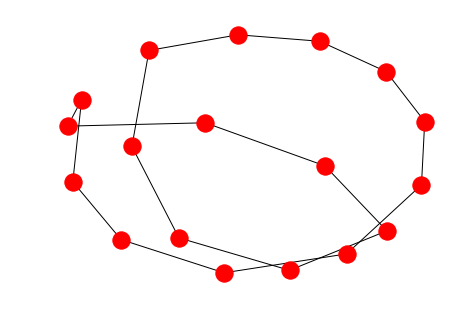

In [17]:
%matplotlib inline
#podemos probar a visualizar uno de los ciclos anteriores, por ejemplo
#obtenemos el subgrafo de los nodos implicados
testfraude = participadasSubGraph.subgraph(fraudlist[53])
nx.draw(testfraude)

In [18]:
#Cogemos el subgrafo anterior y lo salvamos para visualizarlo con Gephi
#h.subgraph(fraudlist[20])
nx.write_gml(h.subgraph(fraudlist[53]),'./Alberto.data/ejemploGephi53.gml')

In [ ]:
lista = [v for u,v,d in participadasSubGraph.edges_iter(data=True) if d['edgetype'] =='PARTICIPADA']

In [ ]:
#nodosEmpresa = filter(lambda (n, d): d['nodetype'] == 'accionistas', g.nodes(data=True))
dd = set(n for n,d in g.nodes_iter(data=True) if d['nodetype']=='empresa')
    


In [6]:
#g.node['B90186883']
nx.nodes(g)
#from operator import itemgetter
#sorted(g.degree_iter(),key=itemgetter(1),reverse=True)

['ESB92074863',
 'ESB43648955',
 'ESB47395082',
 'Fer Do Aceiton Sorrentini',
 'WW*337064749',
 'ESB10440881',
 'Jose Balboa Chan',
 'Ana Belen Escobar Herradon',
 'Laura Mesa Gomez',
 'WW*337064740',
 'WW*337064742',
 'WW*337064743',
 'WW*337064744',
 'ESB38721320',
 'ESB03896800',
 'ESB31908981',
 'ESB36313245',
 'ESB20970562',
 'ESB25549833',
 'ESB14615520',
 'ESA35708791',
 'ESB13353263',
 'Michael Taylor Paul',
 'Jose Luis Martinez De Urbina Abrisqueta',
 'Jose Dominguez Gonzalez',
 'ESB43830686',
 'PT507472241',
 'ESB86049772',
 'Rosario Marin Miguel',
 'WW*360839341',
 'ESB85019040',
 'WW*347395908',
 'ES*340809267',
 'ESB61138772',
 'ESU14896427',
 'ESA83484261',
 'ESA33924465',
 'ESB52014230',
 'WW*340712561',
 'WW*360983195',
 'Miguel Ortega Polo',
 'Maria Pilar Faro Iglesias',
 'PT*343293318',
 'ESB99163727',
 'ESB24227472',
 'Victoriano Alvarez Marines',
 'ESB03919313',
 'ESB12613964',
 'ESB96608120',
 'Thierry Jacques Marie Delobel',
 'Her  Rodrigo Castagna',
 'ESB99293201

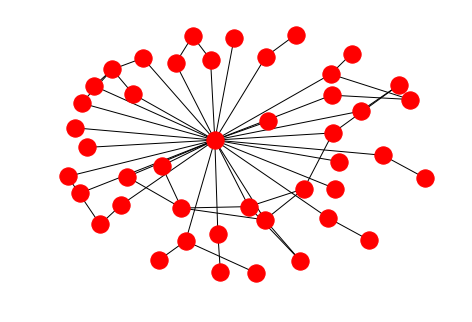

In [3]:
#i=h.node['B36052876']
%matplotlib inline
gg = nx.single_source_shortest_path_length(h ,source='B36052876', cutoff=2)
nx.draw(h.subgraph(gg))
#Cargar un grafo y filtrar por atributos. Obtener grafo solamente de empresas con participadas. 

#con la lista de nodos, obtener el subgrafo.

#filtrar aquellas que 

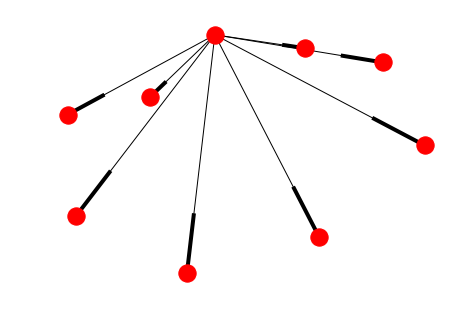

In [25]:
%matplotlib inline

gg = nx.single_source_shortest_path_length(g ,source='ESA28995231', cutoff=1)
nx.draw(g.subgraph(gg))